# ハイパーパラメータの最適化
このセクションはハイパーパラメータの初期値を適当に決めて、学習を繰り返し、結果を観察して低損失値、高正解率を叩きだしたハイパーパラメータを選択していくというもの。特に新しい話題は無い感じなので、テキストのコードをコピペして試していくだけ。

val acc:0.12 | lr:8.204553952512435e-06, weight decay:1.3232601130220543e-06
val acc:0.05 | lr:7.278822723419807e-05, weight decay:7.521949226878906e-07
val acc:0.06 | lr:1.7889200811291584e-05, weight decay:3.771551698446293e-08
val acc:0.1 | lr:5.166523790455e-06, weight decay:1.639225046335413e-08
val acc:0.19 | lr:0.0003982807183503869, weight decay:4.670406730891361e-05
val acc:0.09 | lr:0.00015011865379048963, weight decay:2.0366035990004598e-07
val acc:0.09 | lr:0.0008191049858239044, weight decay:8.535716800602078e-08
val acc:0.14 | lr:0.0004913102560712602, weight decay:1.8557420937694666e-08
val acc:0.2 | lr:2.551480173740049e-05, weight decay:4.0958625379205056e-05
val acc:0.21 | lr:0.0005772168284290018, weight decay:1.084637160781958e-07
val acc:0.05 | lr:3.897327239066689e-06, weight decay:1.5944283342713257e-07
val acc:0.1 | lr:0.0005064684228698617, weight decay:6.723513265388071e-06
val acc:0.47 | lr:0.002994455628124013, weight decay:3.423349969718633e-08
val acc:0.09

Best-19(val acc:0.2) | lr:2.551480173740049e-05, weight decay:4.0958625379205056e-05
Best-20(val acc:0.2) | lr:0.0002305386259982619, weight decay:1.34673955868335e-06


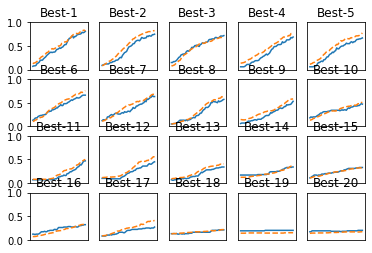

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
